<a href="https://colab.research.google.com/github/CharlesPoletowin/BigDataProject/blob/main/test/cleanLocationToZipTestOn6DataSet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# pip install

In [2]:
!pip install openclean[full]

# import file from nyc opendata

In [3]:
!wget 'https://data.cityofnewyork.us/resource/hg8x-zxpr.csv?$$app_token=5uY6Dy7N0wt19j4Pe9PBQ1y6C&$select=borough,postcode,latitude,longitude&$limit=50000'  -O data2.csv
!ls

--2021-12-11 09:16:18--  https://data.cityofnewyork.us/resource/hg8x-zxpr.csv?$$app_token=5uY6Dy7N0wt19j4Pe9PBQ1y6C&$select=borough,postcode,latitude,longitude&$limit=50000
Resolving data.cityofnewyork.us (data.cityofnewyork.us)... 52.206.140.199, 52.206.68.26, 52.206.140.205
Connecting to data.cityofnewyork.us (data.cityofnewyork.us)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘data2.csv’

data2.csv               [ <=>                ] 194.80K  --.-KB/s    in 0.08s   

2021-12-11 09:16:19 (2.45 MB/s) - ‘data2.csv’ saved [199479]

data2.csv  sample_data


# how to use cleanGeo.py file ?

In [6]:
!wget https://github.com/CharlesPoletowin/BigDataProject/raw/main/src/cleanGeo.py -O cleanGeo.py
!ls

--2021-12-11 09:16:35--  https://github.com/CharlesPoletowin/BigDataProject/raw/main/src/cleanGeo.py
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CharlesPoletowin/BigDataProject/main/src/cleanGeo.py [following]
--2021-12-11 09:16:35--  https://raw.githubusercontent.com/CharlesPoletowin/BigDataProject/main/src/cleanGeo.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1658 (1.6K) [text/plain]
Saving to: ‘cleanGeo.py’

cleanGeo.py         100%[===================>]   1.62K  --.-KB/s    in 0s      

2021-12-11 09:16:35 (13.1 MB/s) - ‘cleanGeo.py’ saved [1658/1658]

cleanGeo.py  data2.csv	__pyca

In [5]:
import pandas as pd
from openclean.profiling.dataset import dataset_profile
from cleanGeo import locationToZip, zipToBorough
import numpy as np

In [10]:
data = pd.read_csv('data2.csv')
data["empty"] = ""

print(data)
print(dataset_profile(data).stats())

            borough  postcode   latitude  longitude empty
0          Brooklyn   11233.0  40.677644 -73.921745      
1          Brooklyn   11233.0  40.677925 -73.927466      
2          Brooklyn   11233.0  40.677823 -73.926554      
3          Brooklyn       NaN        NaN        NaN      
4             Bronx   10452.0  40.831229 -73.921325      
...             ...       ...        ...        ...   ...
5357       Brooklyn       NaN        NaN        NaN      
5358  Staten Island       NaN        NaN        NaN      
5359  Staten Island       NaN        NaN        NaN      
5360       Brooklyn       NaN        NaN        NaN      
5361         Queens       NaN        NaN        NaN      

[5362 rows x 5 columns]
           total  empty  distinct  uniqueness    entropy
borough     5362      0         5    0.000932   2.041637
postcode    5362   1083       143    0.033419   6.174280
latitude    5362   1083      4135    0.966347  11.991752
longitude   5362   1083      4128    0.964711  11.9

In [8]:
# this function is used to solve the problem that we have latitude and longtitude but not hava zip code
data = locationToZip(data, "empty", "latitude", "longitude")
print(dataset_profile(data).stats())

           total  empty  distinct  uniqueness    entropy
borough     5362      0         5    0.000932   2.041637
postcode    5362   1083       143    0.033419   6.174280
latitude    5362   1083      4135    0.966347  11.991752
longitude   5362   1083      4128    0.964711  11.988242
empty       5362      0       151    0.028161   5.654552


In [9]:
data.dropna(subset=['postcode', 'latitude', 'longitude'], inplace=True)
data['postcode'] = data['postcode'].astype(np.int64)
data['empty'] = data['empty'].astype(np.int64)
data['bool'] = np.where(data['postcode'] == data['empty'], 1, 0)
print(data['bool'].sum() - data['bool'].count())

-771


In [ ]:
1 - 771/5362

0.8562103692651996

# try another dataset

In [ ]:
!wget 'https://data.cityofnewyork.us/resource/bty7-2jhb.csv?$$app_token=5uY6Dy7N0wt19j4Pe9PBQ1y6C&$select=borough,zip_code,latitude,longitude&$limit=50000'  -O data3.csv
!ls

--2021-12-11 00:56:10--  https://data.cityofnewyork.us/resource/bty7-2jhb.csv?$$app_token=5uY6Dy7N0wt19j4Pe9PBQ1y6C&$select=borough,zip_code,latitude,longitude&$limit=50000
Resolving data.cityofnewyork.us (data.cityofnewyork.us)... 52.206.140.205, 52.206.68.26, 52.206.140.199
Connecting to data.cityofnewyork.us (data.cityofnewyork.us)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘data3.csv’

data3.csv               [  <=>               ]   1.94M  5.00MB/s    in 0.4s    

2021-12-11 00:56:12 (5.00 MB/s) - ‘data3.csv’ saved [2033795]

cleanGeo.py  data3.csv	data5.csv  data7.csv	sample_data
data2.csv    data4.csv	data6.csv  __pycache__


In [ ]:
data = pd.read_csv('data3.csv')
data["empty"] = ""
print(data.head())
print(dataset_profile(data).stats())
data = locationToZip(data, "empty", "latitude", "longitude")
print(dataset_profile(data).stats())
data.dropna(subset=['zip_code', 'latitude', 'longitude'], inplace=True)
data['zip_code'] = data['zip_code'].astype(np.int64)
data['empty'] = data['empty'].astype(np.int64)
data['bool'] = np.where(data['zip_code'] == data['empty'], 1, 0)
print(data['bool'].sum() - data['bool'].count())

  borough  zip_code   latitude  longitude empty
0   BRONX   10458.0  40.867490 -73.883225      
1   BRONX   10475.0  40.875769 -73.828899      
2   BRONX   10453.0  40.852603 -73.911461      
3   BRONX   10453.0  40.851661 -73.906937      
4   BRONX   10463.0  40.885720 -73.910270      
           total  empty  distinct  uniqueness    entropy
borough    50000      0         1    0.000020   0.000000
zip_code   50000     26        27    0.000540   4.568881
latitude   50000    214     19767    0.397039  13.747694
longitude  50000    214     19880    0.399309  13.749139
empty      50000  50000         0         NaN        NaN
           total  empty  distinct  uniqueness    entropy
borough    50000      0         1    0.000020   0.000000
zip_code   50000     26        27    0.000540   4.568881
latitude   50000    214     19767    0.397039  13.747694
longitude  50000    214     19880    0.399309  13.749139
empty      50000      0        31    0.000620   4.641425
-10013


In [ ]:
1 - 10013 / 50000

0.79974

# try another dataset

In [ ]:
!wget 'https://data.cityofnewyork.us/resource/erm2-nwe9.csv?$$app_token=5uY6Dy7N0wt19j4Pe9PBQ1y6C&$select=borough,incident_zip,latitude,longitude&$limit=50000'  -O data4.csv
!ls

--2021-12-11 00:56:43--  https://data.cityofnewyork.us/resource/erm2-nwe9.csv?$$app_token=5uY6Dy7N0wt19j4Pe9PBQ1y6C&$select=borough,incident_zip,latitude,longitude&$limit=50000
Resolving data.cityofnewyork.us (data.cityofnewyork.us)... 52.206.140.199, 52.206.140.205, 52.206.68.26
Connecting to data.cityofnewyork.us (data.cityofnewyork.us)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘data4.csv’

data4.csv               [    <=>             ]   2.83M  3.12MB/s    in 0.9s    

2021-12-11 00:56:45 (3.12 MB/s) - ‘data4.csv’ saved [2967332]

cleanGeo.py  data3.csv	data5.csv  data7.csv	sample_data
data2.csv    data4.csv	data6.csv  __pycache__


In [ ]:
data = pd.read_csv('data4.csv')
data["empty"] = ""
print(data.head())
print(dataset_profile(data).stats())
data = locationToZip(data, "empty", "latitude", "longitude")
print(dataset_profile(data).stats())
data.dropna(subset=['incident_zip', 'latitude', 'longitude'], inplace=True)
data['incident_zip'] = data['incident_zip'].astype(np.int64)
data['empty'] = data['empty'].astype(np.int64)
data['bool'] = np.where(data['incident_zip'] == data['empty'], 1, 0)
print(data['bool'].sum() - data['bool'].count())

     borough  incident_zip   latitude  longitude empty
0      BRONX       10458.0  40.867556 -73.892138      
1      BRONX       10472.0  40.825023 -73.877378      
2     QUEENS       11412.0  40.688669 -73.755124      
3  MANHATTAN       10023.0  40.780172 -73.985326      
4   BROOKLYN       11225.0  40.663816 -73.952554      
              total  empty  distinct  uniqueness    entropy
borough       50000      0         6    0.000120   2.140665
incident_zip  50000      7       188    0.003761   7.006741
latitude      50000     11     24797    0.496049  13.888545
longitude     50000     11     24797    0.496049  13.888545
empty         50000  50000         0         NaN        NaN
              total  empty  distinct  uniqueness    entropy
borough       50000      0         6    0.000120   2.140665
incident_zip  50000      7       188    0.003761   7.006741
latitude      50000     11     24797    0.496049  13.888545
longitude     50000     11     24797    0.496049  13.888545
empty     

In [ ]:
1 - 10516 / 50000

0.7896799999999999

# try another dataset

In [ ]:
!wget 'https://data.cityofnewyork.us/resource/43nn-pn8j.csv?$$app_token=5uY6Dy7N0wt19j4Pe9PBQ1y6C&$select=zipcode,latitude,longitude&$limit=50000'  -O data5.csv
!ls

--2021-12-11 00:57:12--  https://data.cityofnewyork.us/resource/43nn-pn8j.csv?$$app_token=5uY6Dy7N0wt19j4Pe9PBQ1y6C&$select=zipcode,latitude,longitude&$limit=50000
Resolving data.cityofnewyork.us (data.cityofnewyork.us)... 52.206.68.26, 52.206.140.205, 52.206.140.199
Connecting to data.cityofnewyork.us (data.cityofnewyork.us)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘data5.csv’

data5.csv               [      <=>           ]   2.11M  1.59MB/s    in 1.3s    

2021-12-11 00:57:14 (1.59 MB/s) - ‘data5.csv’ saved [2210615]

cleanGeo.py  data3.csv	data5.csv  data7.csv	sample_data
data2.csv    data4.csv	data6.csv  __pycache__


In [ ]:
data = pd.read_csv('data5.csv')
data["empty"] = ""
zipcode = 'zipcode'
print(data.head())
print(dataset_profile(data).stats())
data = locationToZip(data, "empty", "latitude", "longitude")
print(dataset_profile(data).stats())
data.dropna(subset=[zipcode, 'latitude', 'longitude'], inplace=True)
data[zipcode] = data[zipcode].astype(np.int64)
data['empty'] = data['empty'].astype(np.int64)
data['bool'] = np.where(data[zipcode] == data['empty'], 1, 0)
print(data['bool'].sum() - data['bool'].count())

   zipcode   latitude  longitude empty
0  11103.0  40.768484 -73.911229      
1  11209.0  40.633865 -74.026798      
2  10065.0  40.766363 -73.962502      
3  11222.0  40.725973 -73.940596      
4  11232.0  40.654388 -74.004343      
           total  empty  distinct  uniqueness    entropy
zipcode    50000    751       218    0.004426   7.023235
latitude   50000     48     16660    0.333520  13.540632
longitude  50000     48     16660    0.333520  13.540632
empty      50000  50000         0         NaN        NaN
           total  empty  distinct  uniqueness    entropy
zipcode    50000    751       218    0.004426   7.023235
latitude   50000     48     16660    0.333520  13.540632
longitude  50000     48     16660    0.333520  13.540632
empty      50000      0       206    0.004120   7.217605
-12447


In [ ]:
1 - 12447 / 50000

0.7510600000000001

# try another data set

In [ ]:
!wget 'https://data.cityofnewyork.us/resource/59kj-x8nc.csv?$$app_token=5uY6Dy7N0wt19j4Pe9PBQ1y6C&$select=zip,latitude,longitude&$limit=50000'  -O data6.csv
!ls

--2021-12-11 00:57:41--  https://data.cityofnewyork.us/resource/59kj-x8nc.csv?$$app_token=5uY6Dy7N0wt19j4Pe9PBQ1y6C&$select=zip,latitude,longitude&$limit=50000
Resolving data.cityofnewyork.us (data.cityofnewyork.us)... 52.206.140.199, 52.206.140.205, 52.206.68.26
Connecting to data.cityofnewyork.us (data.cityofnewyork.us)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘data6.csv’

data6.csv               [  <=>               ]   1.57M  4.87MB/s    in 0.3s    

2021-12-11 00:57:42 (4.87 MB/s) - ‘data6.csv’ saved [1649248]

cleanGeo.py  data3.csv	data5.csv  data7.csv	sample_data
data2.csv    data4.csv	data6.csv  __pycache__


In [ ]:
data = pd.read_csv('data6.csv')
data["empty"] = ""
zipcode = 'zip'
print(data.head())
print(dataset_profile(data).stats())
data = locationToZip(data, "empty", "latitude", "longitude")
print(dataset_profile(data).stats())
data.dropna(subset=[zipcode, 'latitude', 'longitude'], inplace=True)
data[zipcode] = data[zipcode].astype(np.int64)
data['empty'] = data['empty'].astype(np.int64)
data['bool'] = np.where(data[zipcode] == data['empty'], 1, 0)
print(data['bool'].sum() - data['bool'].count())

       zip   latitude  longitude empty
0  11226.0  40.639709 -73.953068      
1  10065.0  40.767250 -73.970415      
2  11222.0  40.731788 -73.952751      
3  10457.0  40.856598 -73.900434      
4  10455.0  40.811197 -73.908810      
           total  empty  distinct  uniqueness    entropy
zip        50000     13       178    0.003561   6.646155
latitude   50000     30     26375    0.527817  14.271455
longitude  50000     30     26039    0.521093  14.245269
empty      50000  50000         0         NaN        NaN
           total  empty  distinct  uniqueness    entropy
zip        50000     13       178    0.003561   6.646155
latitude   50000     30     26375    0.527817  14.271455
longitude  50000     30     26039    0.521093  14.245269
empty      50000      0       202    0.004040   6.676660
-10168


In [ ]:
1 - 10168 / 50000

0.79664

# try another data set

In [ ]:
!wget 'https://data.cityofnewyork.us/resource/9a87-6m4x.csv?$$app_token=5uY6Dy7N0wt19j4Pe9PBQ1y6C&$select=zip_code,latitude,longitude&$limit=50000'  -O data7.csv
!ls


--2021-12-11 00:58:08--  https://data.cityofnewyork.us/resource/9a87-6m4x.csv?$$app_token=5uY6Dy7N0wt19j4Pe9PBQ1y6C&$select=zip_code,latitude,longitude&$limit=50000
Resolving data.cityofnewyork.us (data.cityofnewyork.us)... 52.206.140.199, 52.206.140.205, 52.206.68.26
Connecting to data.cityofnewyork.us (data.cityofnewyork.us)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘data7.csv’

data7.csv               [ <=>                ]  16.01K  --.-KB/s    in 0s      

2021-12-11 00:58:09 (135 MB/s) - ‘data7.csv’ saved [16399]

cleanGeo.py  data3.csv	data5.csv  data7.csv	sample_data
data2.csv    data4.csv	data6.csv  __pycache__


In [ ]:
data = pd.read_csv('data7.csv')
data["empty"] = ""
zipcode = 'zip_code'
print(data.head())
print(dataset_profile(data).stats())
data = locationToZip(data, "empty", "latitude", "longitude")
print(dataset_profile(data).stats())
data.dropna(subset=[zipcode, 'latitude', 'longitude'], inplace=True)
data[zipcode] = data[zipcode].astype(np.int64)
data['empty'] = data['empty'].astype(np.int64)
data['bool'] = np.where(data[zipcode] == data['empty'], 1, 0)
print(data['bool'].sum() - data['bool'].count())


   zip_code   latitude  longitude empty
0   11354.0  40.760612 -73.833642      
1   11437.0  40.668289 -73.795990      
2   11373.0  40.732880 -73.888332      
3   11224.0  40.576052 -73.985756      
4   11354.0        NaN        NaN      
           total  empty  distinct  uniqueness   entropy
zip_code     545      4       136    0.251386  6.429949
latitude     545     69       458    0.962185  8.803411
longitude    545     69       462    0.970588  8.820217
empty        545    545         0         NaN       NaN
           total  empty  distinct  uniqueness   entropy
zip_code     545      4       136    0.251386  6.429949
latitude     545     69       458    0.962185  8.803411
longitude    545     69       462    0.970588  8.820217
empty        545      0       136    0.249541  6.290450
-165


In [ ]:
1 - 165 / 545

0.6972477064220184

### Recall

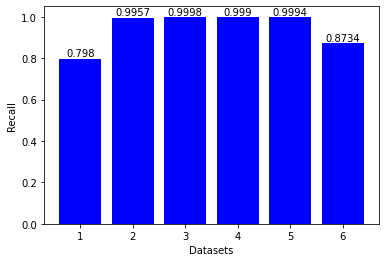

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
x = [1, 2, 3, 4, 5, 6]
recall = [(5362-1083)/5362, (50000-214)/50000, (50000-11)/50000, (50000-48)/50000, (50000-30)/50000, (545-69)/545]
plt.bar(x, height = recall, color = "blue")
plt.xlabel("Datasets")
plt.ylabel("Recall")
for i in range(len(recall)):
  plt.text(i+1, recall[i], round(recall[i], 4), ha = 'center', va = 'bottom')
plt.show()